**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

Goal: Perform exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade. 

1. what was the most frequent movie duration in the 1990s? save an approximate answer as an integer called duration (use 1990 as the decade's start year).
2. a movie is considered short if it is less than 90 mins. count the number of short action movies released in the 1990s and save this integer as short_movie_count. 


Structure: <br>

Section 1: Setup and initial Exploration <br>
    - Import necessary libraries: pandas, matplotlib <br>
    - Load data: netflix_data.csv <br>
    - First look: .head(); .info(); .describe() <br>

Section 2: Data cleaning and Preparation <br>
    - Filter for the 1990s decade: movies_90s <br>
    - Handle missing values <br>
    - Isolate movies <br>
    
Section 3: Analysis and Visualization 

In [15]:
# import pandas and matplotlib

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# read the csv as a dataframe
netflix_df = pd.read_csv("netflix_data.csv")

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [ ]:
# quick look of the data
# netflix_df.info()
# netflix_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [10]:
# filter for the 1990s decade 
movies_90s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999) & (netflix_df['type'] == 'Movie')]

In [6]:
duration = movies_90s['duration'].mode()[0]
print(duration)

94


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


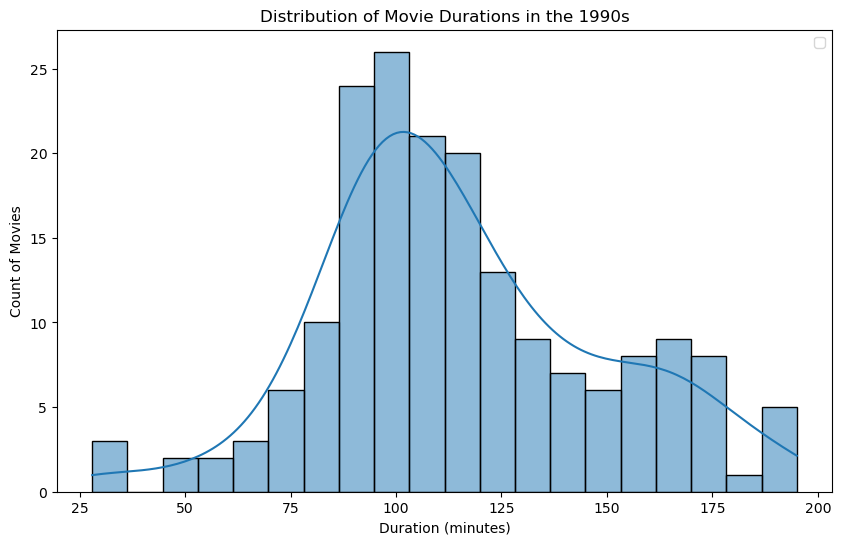

In [12]:
# distribution of movie duration

plt.figure(figsize=(10, 6))
sns.histplot(data= movies_90s, x= 'duration', bins=20, kde=True)

plt.title("Distribution of Movie Durations in the 1990s")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count of Movies")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


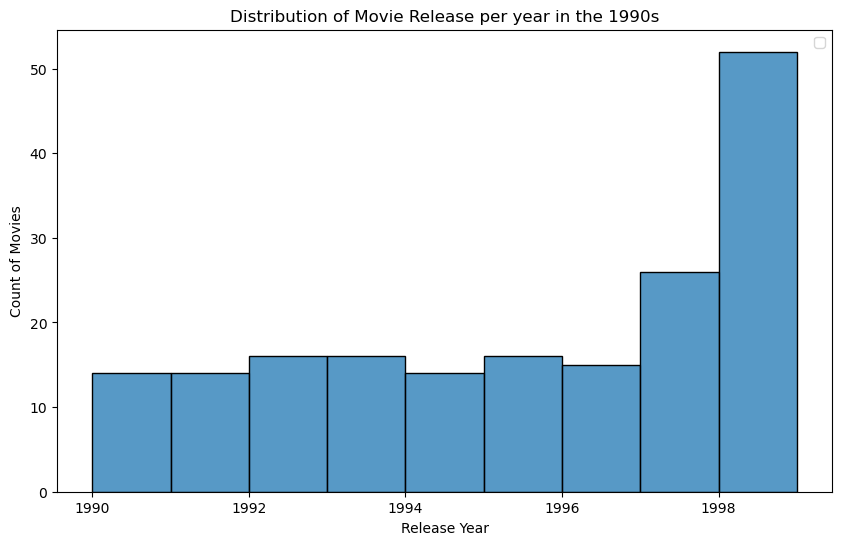

In [13]:
# distribution of movie released per year

plt.figure(figsize=(10, 6))
sns.histplot(data= movies_90s, x= 'release_year')

plt.title("Distribution of Movie Release per year in the 1990s")
plt.xlabel("Release Year")
plt.ylabel("Count of Movies")
plt.legend()
plt.show()

In [14]:
# filter for the short movie count
short_movie = movies_90s[(movies_90s['duration'] < 90) & (movies_90s['genre'] == 'Action')]

In [8]:
short_movie_count = len(short_movie)
print(short_movie_count)

7


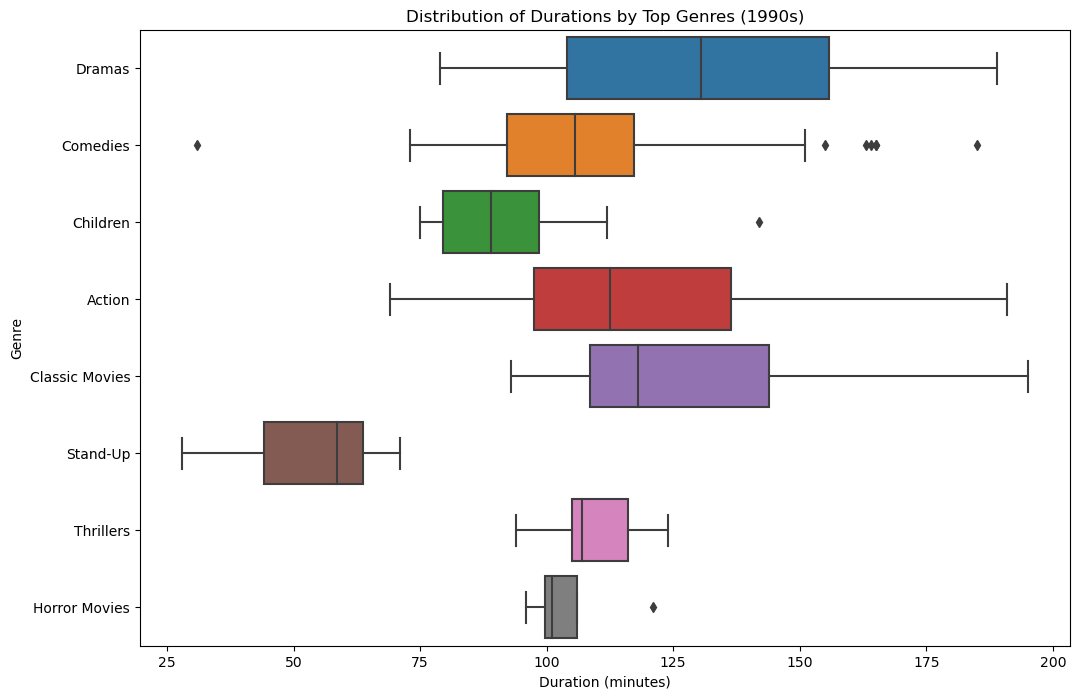

In [19]:
# boxplot of duration by Genre
# create a Series with individual genres 
top_genres = movies_90s['genre'].value_counts().index[:8]
genre_pattern = '|'.join(top_genres)
movies_top_genres = movies_90s[movies_90s['genre'].str.contains(genre_pattern)]

plt.figure(figsize=(12,8))
sns.boxplot(data=movies_top_genres, x='duration', y='genre')

plt.title('Distribution of Durations by Top Genres (1990s)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Genre')
plt.show()